<a href="https://colab.research.google.com/github/KelvinLam05/Cohort_Analysis/blob/main/cohort_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal of the project**

Customer cohort analysis examines differences between customers over time and is a powerful tool in guiding ecommerce acquisition strategy. Here's how it's done.

**Data set information**

Detailed data on sales of consumer goods obtained by ‘scanning’ the bar codes for individual products at electronic points of sale in a retail store. The data provide detailed information about quantities, characteristics and values of goods sold as well as their prices. The anonymized dataset includes 64.682 transactions of 5.242 SKU's sold to 22.625 customers during one year.

**Load the packages**

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from ecommercetools import utilities
from ecommercetools import transactions
from ecommercetools import customers

**Load the data**

In [ ]:
# Load dataset
filename = '/content/retail_scanner_data.csv'
df = pd.read_csv(filename)
df.head()

,unnamed: 0,date,customer_id,transaction_id,sku_category,sku,quantity,sales_amount
0,1,2016-02-01,2547,1,X52,0EM7L,1,3.13
1,2,2016-02-01,822,2,2ML,68BRQ,1,5.46
2,3,2016-02-01,3686,3,0H2,CZUZX,1,6.35
3,4,2016-02-01,3719,4,0H2,549KK,1,5.59
4,5,2016-02-01,9200,5,0H2,K8EHH,1,6.88


EcommerceTools requires that we standardise the column names in our transaction items dataframe.

In [ ]:
transaction_items = utilities.load_transaction_items(filename,
                                                     date_column = 'date',
                                                     order_id_column = 'transaction_id',
                                                     customer_id_column = 'customer_id',
                                                     sku_column = 'sku',
                                                     quantity_column = 'quantity',
                                                     unit_price_column = 'sales_amount')

transaction_items.head()

,unnamed: 0,order_date,customer_id,order_id,sku_category,sku,quantity,unit_price,line_price
0,1,2016-02-01,2547,1,X52,0EM7L,1,3.13,3.13
1,2,2016-02-01,822,2,2ML,68BRQ,1,5.46,5.46
2,3,2016-02-01,3686,3,0H2,CZUZX,1,6.35,6.35
3,4,2016-02-01,3719,4,0H2,549KK,1,5.59,5.59
4,5,2016-02-01,9200,5,0H2,K8EHH,1,6.88,6.88


**Create a customer cohort analysis dataset**

The acquisition cohort is a label which identifies the period during which each customer was acquired. Depending on the size of your dataset and the frequency at which your customers order, you might want to use monthly, quarterly, or yearly cohorts. 

By default, this uses a monthly cohort, so a customer ordering on 2016-04-07 04:55:58 would be placed in a cohort called 2016-04. The new cohort labels get added to a DataFrame containing the unique customer_id, order_id, and order_date.

In [ ]:
cohorts_df = customers.get_cohorts(transaction_items, period = 'M')
cohorts_df.head()

,customer_id,order_id,order_date,acquisition_cohort,order_cohort
0,2547,1,2016-02-01,2016-01,2016-02
1,822,2,2016-02-01,2016-01,2016-02
2,3686,3,2016-02-01,2016-01,2016-02
3,3719,4,2016-02-01,2016-01,2016-02
4,9200,5,2016-02-01,2016-02,2016-02


**Create a customer "retention" dataset**

Next, we count how many of the customers acquired in a given cohort purchased again in subsequent periods. It’s common in cohort analysis to call this customer retention, but arguably it’s just a repurchase metric.

In [ ]:
retention_df = customers.get_retention(transaction_items)
retention_df.head()

,acquisition_cohort,order_cohort,customers,periods
0,2016-01,2016-01,3817,0
1,2016-01,2016-02,1104,1
2,2016-01,2016-03,971,2
3,2016-01,2016-04,899,3
4,2016-01,2016-05,823,4


**Create a customer cohort analysis matrix**


Next, we will create a cohort matrix. This is a dataframe which shows each acquisition cohort on its own line and shows the number of customers who purchased in each subsequent period. If we set the percentage argument to True, the function will return the percentage of customers, instead of the raw numbers.

In [ ]:
cohort_matrix_df = customers.get_cohort_matrix(transaction_items, period = 'M', percentage = True)
cohort_matrix_df.head()

periods,0,1,2,3,4,5,6,7,8,9,10,11
acquisition_cohort,,,,,,,,,,,,
2016-01,1.0,0.289232,0.254388,0.235525,0.215614,0.182604,0.188106,0.189416,0.183652,0.166361,0.182604,0.187582
2016-02,1.0,0.199348,0.186662,0.185212,0.158028,0.152229,0.160928,0.165640,0.162378,0.167814,0.157666,NaN
2016-03,1.0,0.216877,0.203131,0.182894,0.181749,0.174112,0.179076,0.177931,0.175258,0.192822,NaN,NaN
2016-04,1.0,0.190227,0.174084,0.159686,0.160558,0.181501,0.158377,0.170593,0.169721,NaN,NaN,NaN
2016-05,1.0,0.144495,0.144037,0.133945,0.147248,0.154128,0.142202,0.149083,NaN,NaN,NaN,NaN


**Creating cohort analysis heatmaps**

Finally, we can create a heatmap to visualise our cohort. For each of the cohorts in our cohort matrix, this shows the percentage of the acquired customers who came back and purchased within a later period. 

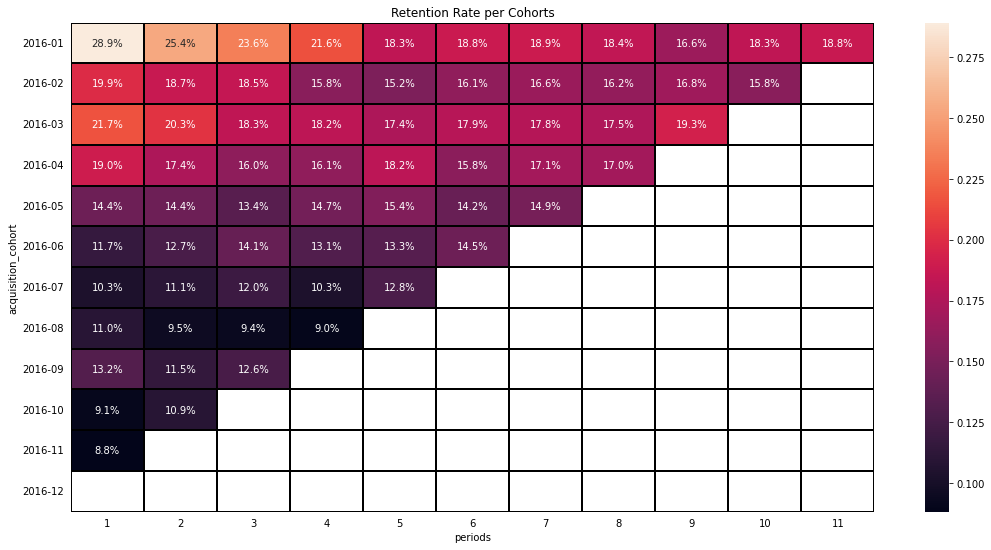

In [ ]:
plt.figure(figsize = (18, 9))
plt.title('Retention Rate per Cohorts')
ax = sns.heatmap(cohort_matrix_df.iloc[:, 1:], annot = True, fmt = '.1%', linewidths = 1, linecolor = 'black')
ax.tick_params(left = False, bottom = False); 

From the above retention table – Triangular chart, we can infer the following

* We see that the retention rates plunge after 1 month. Of the people that became our customer in January, only 28,9% makes another purchase the next month. 

* Customers acquired later on are churning faster. Of the people that became our customer in October, only 10.9% of the customers made a purchase 2 months after their initial purchase.